# Import Library

In [ ]:
!pip install feature_engine

In [ ]:
# poa == price == nan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# from feature_engine.imputation import CategoricalImputer





# Import File

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/test/test_third/orca_share_media1705016862946_7151359048325525184.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14441 non-null  object 
 1   Year               14441 non-null  float64
 2   Model              14441 non-null  object 
 3   Car/Suv            14414 non-null  object 
 4   Title              14441 non-null  object 
 5   UsedOrNew          14441 non-null  object 
 6   Transmission       14441 non-null  object 
 7   Engine             14441 non-null  object 
 8   DriveType          14441 non-null  object 
 9   FuelType           14441 non-null  object 
 10  FuelConsumption    14441 non-null  object 
 11  Kilometres         14441 non-null  object 
 12  ColourExtInt       14441 non-null  object 
 13  Location           13992 non-null  object 
 14  CylindersinEngine  14441 non-null  object 
 15  BodyType           14207 non-null  object 
 16  Doors              131

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


# Data Preprocessing

## clean null all column in each records

In [ ]:
df[98:2393]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
98,Toyota,2013.0,HiAce,Nippon Motors,2013 Toyota HiAce DX,USED,Automatic,-,Other,Diesel,-,191173,Silver / Black,"Ingleburn, NSW",-,Commercial,NaN,NaN,30900
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list_drop_record = [i for i in range(99,2392)]
df = df.drop(list_drop_record, axis=0).reset_index()
del df['index']
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14441 entries, 0 to 14440
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14441 non-null  object 
 1   Year               14441 non-null  float64
 2   Model              14441 non-null  object 
 3   Car/Suv            14414 non-null  object 
 4   Title              14441 non-null  object 
 5   UsedOrNew          14441 non-null  object 
 6   Transmission       14441 non-null  object 
 7   Engine             14441 non-null  object 
 8   DriveType          14441 non-null  object 
 9   FuelType           14441 non-null  object 
 10  FuelConsumption    14441 non-null  object 
 11  Kilometres         14441 non-null  object 
 12  ColourExtInt       14441 non-null  object 
 13  Location           13992 non-null  object 
 14  CylindersinEngine  14441 non-null  object 
 15  BodyType           14207 non-null  object 
 16  Doors              131

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14436,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
14437,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
14438,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
14439,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


## clean seperate word

In [ ]:
# df['engine']
list_engine_capacity = []
list_engine_power = []
list_engine_column = df['Engine'].tolist()
for i in range(len(list_engine_column)):
  if '-' == list_engine_column[i]:
    list_engine_capacity.append(np.nan)
    list_engine_power.append(np.nan)
  elif 'cyl' in list_engine_column[i] and 'L' in list_engine_column[i]:
    list_engine_capacity.append(int(list_engine_column[i].split(" cyl, ")[0]))
    list_engine_power.append(float(list_engine_column[i].split(" cyl, ")[1].split(" L")[0]))
  elif 'L' in list_engine_column[i]:
    list_engine_capacity.append(np.nan)
    list_engine_power.append(float(list_engine_column[i].split(' L')[0]))

  elif 'cyl' in list_engine_column[i]:
    list_engine_capacity.append(int(list_engine_column[i].split(' cyl')[0]))
    list_engine_power.append(np.nan)
df['engine_capacity'] = list_engine_capacity
df['engine_power'] = list_engine_power
del df['Engine']
# print(list_engine_capacity)
# df





In [ ]:
# year
df['Year'] = df['Year'].map(lambda x : int(x))


# FuelConsumption
df['fuel_consumption_rate'] = df['FuelConsumption'].map(lambda x : x.split(' L')[0]).map(lambda x : x if x == '-' else float(x))
df['fuel_consumption_kilometres'] = df['FuelConsumption'].map(lambda x : x[-6:-3] if (len(x)>=2) else x)
df['fuel_consumption_kilometres'].unique().tolist()
del df['fuel_consumption_kilometres']
del df['FuelConsumption']

# ColourExtInt
df['colour_exterior'] = df['ColourExtInt'].map(lambda x : x.split(' / ')[0])
df['colour_interior'] = df['ColourExtInt'].map(lambda x : x.split(' / ')[1])
del df['ColourExtInt']

# CylindersinEngine
del df['CylindersinEngine']

# Doors
df['Doors'] = df['Doors'].map(lambda x : x if (pd.isna(x)) else int(x.split(" ")[1]))
# Seats
df['Seats'] = df['Seats'].map(lambda x : x if (pd.isna(x)) else int(x.split(" ")[1]))

In [ ]:
# Kilometres, engine_capacity, engine_power, fuel_consumption_rate

In [ ]:
# df['price']
list_price = df['Price'].tolist()
temp_price = []
for i in range(len(list_price)):
  try:
    temp_price.append(int(list_price[i]))
  except:
    temp_price.append(np.nan)
    # print(test)
# temp_price
df['Price'] = temp_price

In [ ]:
df['Kilometres'].unique()

array(['5595', '16', '8472', ..., '5165', '85525', '31852'], dtype=object)

In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14441 entries, 0 to 14440
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  14441 non-null  object 
 1   Year                   14441 non-null  int64  
 2   Model                  14441 non-null  object 
 3   Car/Suv                14414 non-null  object 
 4   Title                  14441 non-null  object 
 5   UsedOrNew              14441 non-null  object 
 6   Transmission           14441 non-null  object 
 7   DriveType              14441 non-null  object 
 8   FuelType               14441 non-null  object 
 9   Kilometres             14441 non-null  object 
 10  Location               13992 non-null  object 
 11  BodyType               14207 non-null  object 
 12  Doors                  13119 non-null  float64
 13  Seats                  13023 non-null  float64
 14  Price                  14389 non-null  float64
 15  en

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,Location,BodyType,Doors,Seats,Price,engine_capacity,engine_power,fuel_consumption_rate,colour_exterior,colour_interior
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,5595,"Caringbah, NSW",SUV,4.0,7.0,51990.0,4.0,2.2,8.7,White,Black
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,16,"Brookvale, NSW",Hatchback,5.0,5.0,19990.0,4.0,1.5,6.7,Black,Black
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,8472,"Sylvania, NSW",Coupe,2.0,4.0,108988.0,4.0,2.0,6.6,Grey,White
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,136517,"Mount Druitt, NSW",Coupe,2.0,4.0,32990.0,8.0,5.5,11.0,White,Brown
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,1035,"Castle Hill, NSW",SUV,4.0,5.0,34990.0,4.0,1.3,6.0,Grey,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14436,Toyota,2014,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,Front,Unleaded,66000,"Rocklea, QLD",Commercial,7.0,NaN,29500.0,NaN,NaN,-,Grey,-
14437,Mercedes-Benz,2012,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,Rear,Diesel,117432,"Port Melbourne, VIC",NaN,NaN,NaN,39888.0,NaN,NaN,-,Silver,-
14438,Suzuki,2022,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,Front,Unleaded,5165,"Dinmore, QLD",SUV,4.0,5.0,35280.0,4.0,1.6,6.2,Yellow,-
14439,Mercedes-Benz,2016,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,AWD,Premium,85525,"Albion, QLD",SUV,4.0,5.0,41888.0,4.0,2.0,7.2,Grey,Black


## clean nan value in number

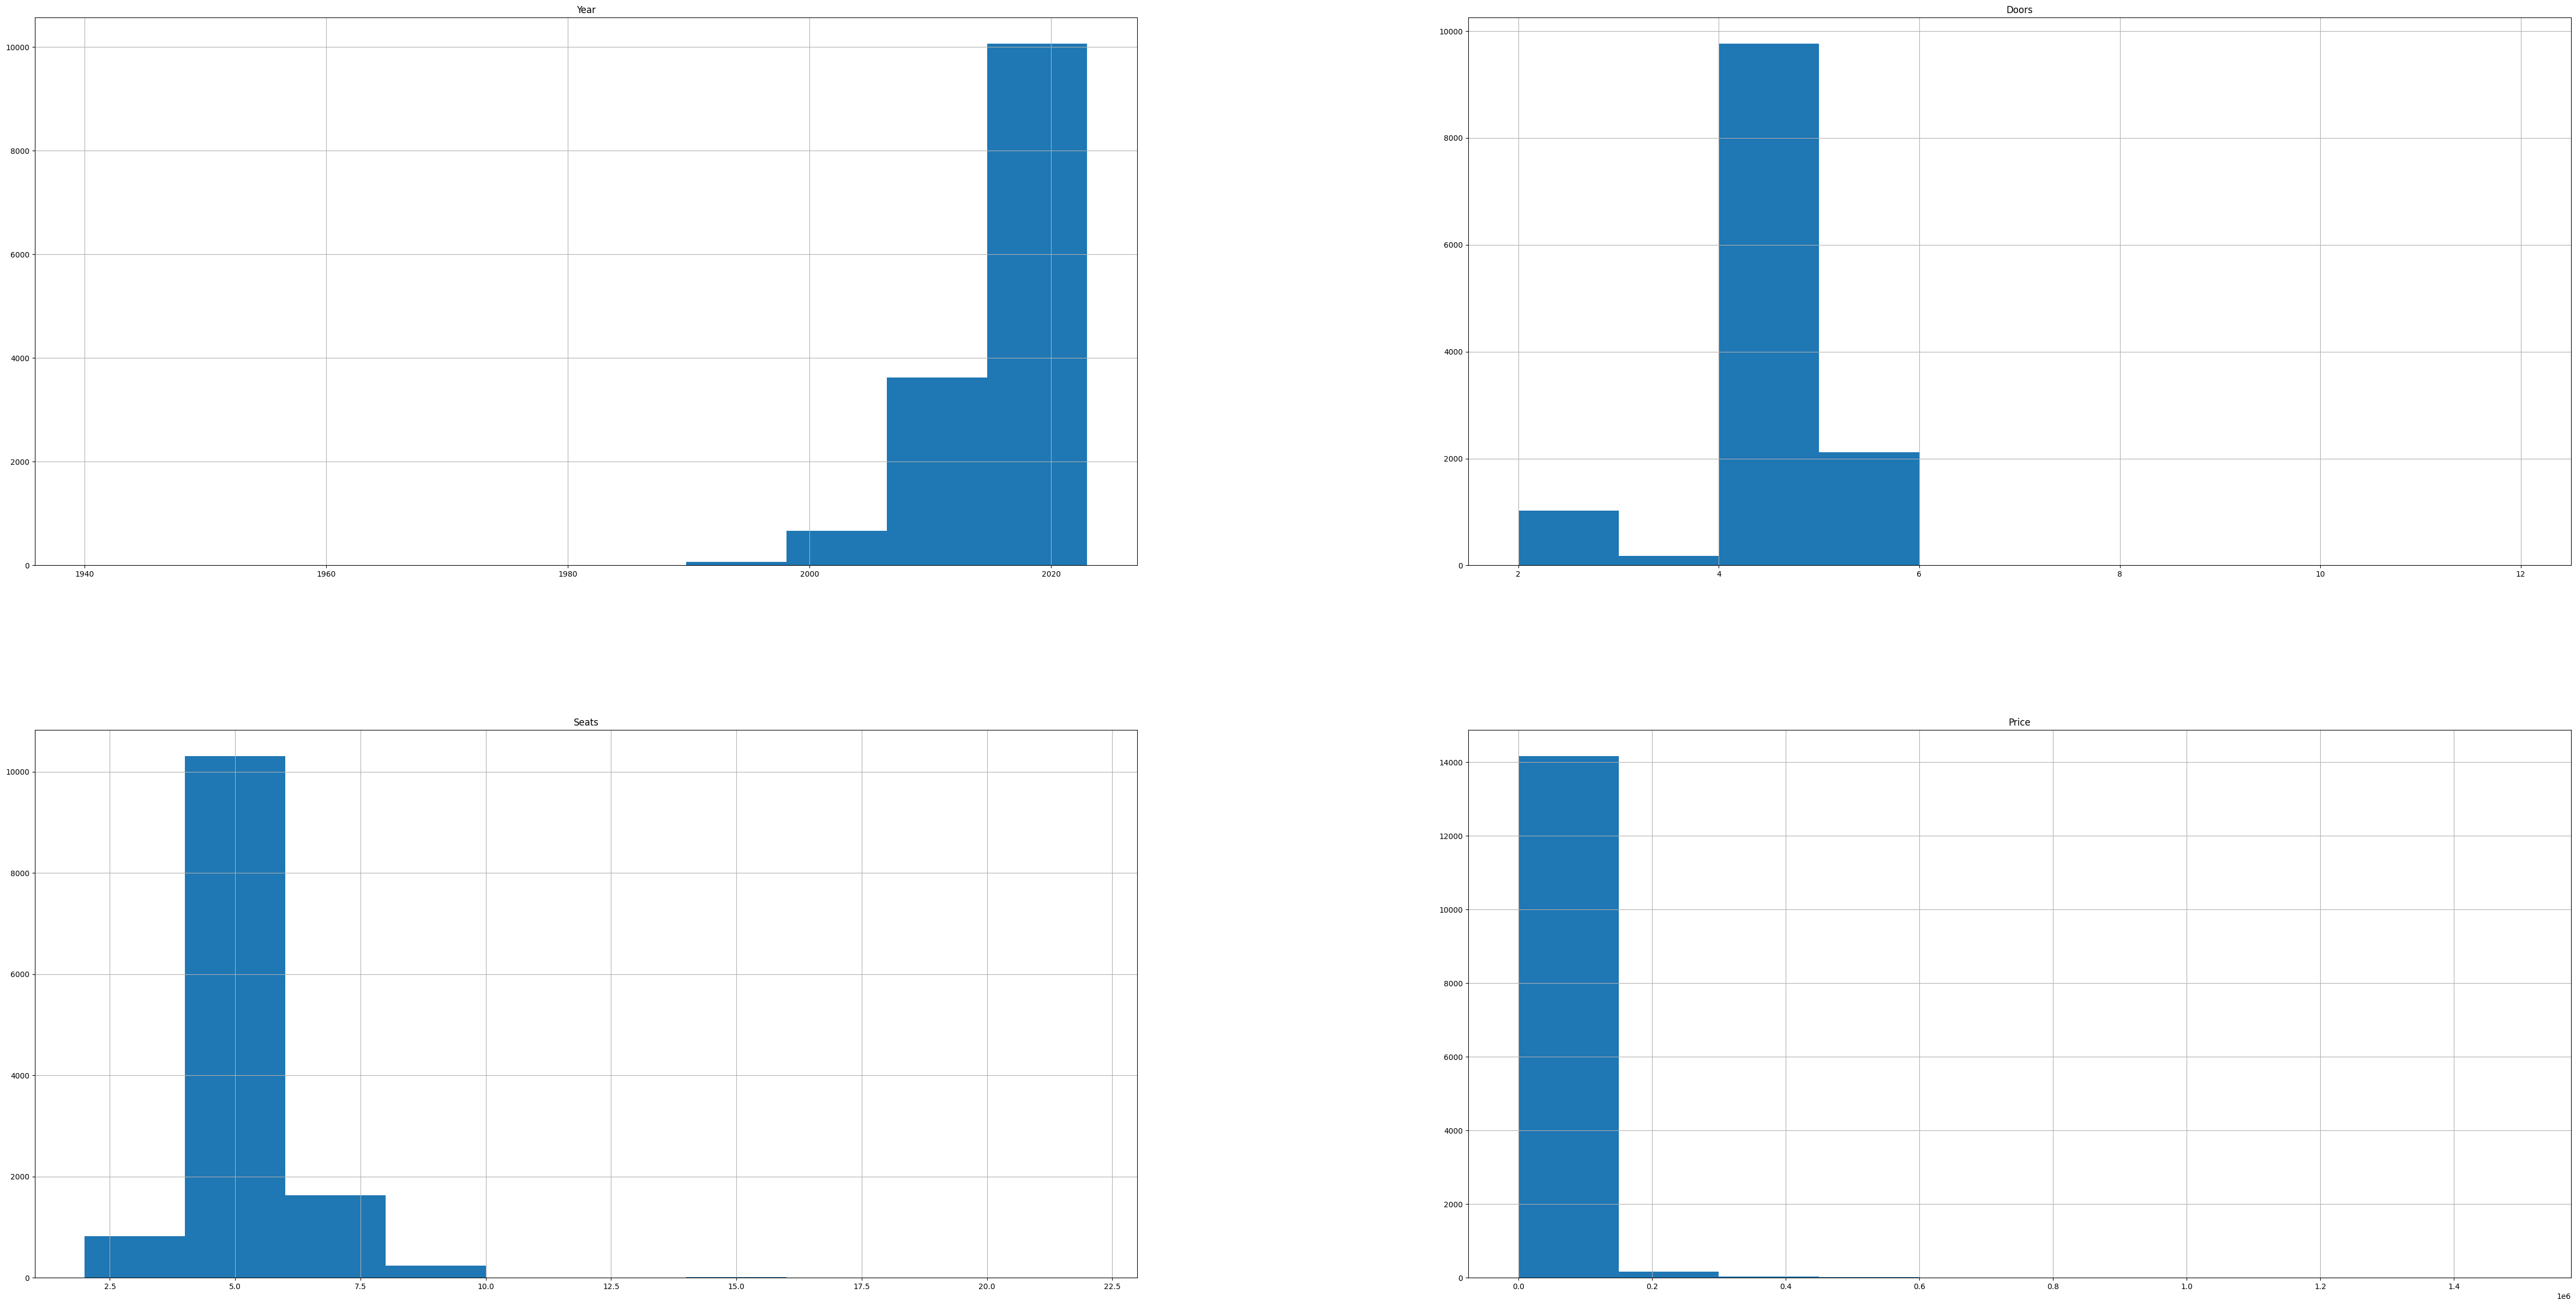

In [ ]:
# not distribution in 4 columns ==> use median.
df.hist(figsize = (60,30))
plt.show()

In [ ]:
# we use median because data not distribution so much
# Doors
# Seats
# Price
ct = ColumnTransformer(
    [("median_imp", SimpleImputer(strategy = 'median'), ['Doors','Seats','Price'])])
df[['Doors','Seats','Price']] = ct.fit_transform(df)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14441 entries, 0 to 14440
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  14441 non-null  object 
 1   Year                   14441 non-null  int64  
 2   Model                  14441 non-null  object 
 3   Car/Suv                14414 non-null  object 
 4   Title                  14441 non-null  object 
 5   UsedOrNew              14441 non-null  object 
 6   Transmission           14441 non-null  object 
 7   DriveType              14441 non-null  object 
 8   FuelType               14441 non-null  object 
 9   Kilometres             14441 non-null  object 
 10  Location               13992 non-null  object 
 11  BodyType               14207 non-null  object 
 12  Doors                  14441 non-null  float64
 13  Seats                  14441 non-null  float64
 14  Price                  14441 non-null  float64
 15  en

## clean nan value in object type

In [ ]:
# easy way
ct = ColumnTransformer(
    [("most_frequent_imp", SimpleImputer(strategy = 'most_frequent', fill_value=None), ["Car/Suv","Location","BodyType"])])
df[["Car/Suv","Location","BodyType"]] = ct.fit_transform(df)



In [ ]:
df[df["Car/Suv"].isna()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,Location,BodyType,Doors,Seats,Price,engine_capacity,engine_power,fuel_consumption_rate,colour_exterior,colour_interior


In [ ]:
# imputer = CategoricalImputer()
# list_feature_dummy = ["Car/Suv","Location","BodyType"]

# for i in range(len(list_feature_dummy)):
#   data_numpy = np.array(df[[f'{list_feature_dummy[i]}']], dtype=object)
#   predict_categorical = imputer.fit_transform(data_numpy)['x0'].tolist()
#   df[f"{list_feature_dummy[i]}"] = predict_categorical
# df['Car/Suv'][12552], df['Car/Suv'][12664], df['Car/Suv'][12707], df['Car/Suv'][12742], df['Car/Suv'][12763]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14441 entries, 0 to 14440
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  14441 non-null  object 
 1   Year                   14441 non-null  int64  
 2   Model                  14441 non-null  object 
 3   Car/Suv                14441 non-null  object 
 4   Title                  14441 non-null  object 
 5   UsedOrNew              14441 non-null  object 
 6   Transmission           14441 non-null  object 
 7   DriveType              14441 non-null  object 
 8   FuelType               14441 non-null  object 
 9   Kilometres             14441 non-null  object 
 10  Location               14441 non-null  object 
 11  BodyType               14441 non-null  object 
 12  Doors                  14441 non-null  float64
 13  Seats                  14441 non-null  float64
 14  Price                  14441 non-null  float64
 15  en

In [ ]:
df.head(3)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,Location,BodyType,Doors,Seats,Price,engine_capacity,engine_power,fuel_consumption_rate,colour_exterior,colour_interior
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,5595,"Caringbah, NSW",SUV,4.0,7.0,51990.0,4,2.2,8.7,White,Black
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,16,"Brookvale, NSW",Hatchback,5.0,5.0,19990.0,4,1.5,6.7,Black,Black
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,8472,"Sylvania, NSW",Coupe,2.0,4.0,108988.0,4,2.0,6.6,Grey,White


In [ ]:
# Qualitative variable which can not be measured ==> use get dummy
# Brand, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, DriveType, FuelType, ColourExtInt, Location, BodyType
# Brand, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, DriveType, FuelType, ColourExtInt, Location, BodyType
Location, colour_exterior, colour_interior

# Quantitative variable which can be measured ==> have to inplace value
# FuelConsumption, Kilometres, CylindersinEngine
# FuelConsumption, Kilometres, CylindersinEngine
Brand, Model, Car/Suv, Title, UsedOrNew, Transmission, DriveType, FuelType, BodyType,



Brand, Model, Car/Suv, Title, UsedOrNew, Transmission, DriveType, FuelType, Kilometres, Location, BodyType, engine_capacity, engine_power, fuel_consumption_rate, colour_exterior, colour_interior

# integer
Kilometres, engine_capacity, engine_power, fuel_consumption_rate



In [ ]:
df['colour_interior'].unique().tolist()

['Black',
 'White',
 'Brown',
 '-',
 'Grey',
 'Tobacco',
 'Black Cloth',
 'Black Leather',
 'Storm Grey',
 'Grey  Cloth',
 'Leather',
 'Black  Cloth',
 'Perforated Nappa Leather Accented Charcoal | Charcoal Interior',
 'Beige',
 'Biege',
 'Nexus Dark Grey',
 'Anthracite & Titanium Black',
 'Red',
 'Cloth',
 'Black Yellow',
 'Black & Grey Cloth',
 'Cloth Rapton',
 'Knight Black',
 'Coffee',
 'Leather Vernasca Bla',
 'Perforated Charcoal Leather',
 'Rs',
 'Burgandy',
 'Vernasca Black Leather & Decor Stitching',
 'Dakota Black Leather',
 'Titanium Black',
 'Titan Black',
 'Tan Leather',
 'Charcoal Leather',
 'Black Grey',
 'Petrol Blue',
 'Nougat Brown',
 'Charcoal',
 'Black/Grey',
 'Titanium Black Cloth',
 'Grey Leather',
 "Excl.leather 'Nappa' Mocca Excl. S Titching/Leathe",
 'Interior Design Suite Amido',
 'Knight Black Synthetic Leather',
 'Blue/Black',
 'Silver',
 'Black And Cream',
 'Bc',
 'Cream Leather',
 'Pistachio Beige',
 'Grey Cloth',
 'Walnut Brown Nappa Leather',
 'Grey/Blue

In [ ]:
test = pd.DataFrame({'category_column': ['apple', 'banana', 'orange', 'apple']})

# Convert categorical text to numeric codes
test['category_codes'] = test['category_column'].astype('category').cat.codes

print(test)

  category_column  category_codes
0           apple               0
1          banana               1
2          orange               2
3           apple               0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14441 entries, 0 to 14440
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  14441 non-null  object 
 1   Year                   14441 non-null  int64  
 2   Model                  14441 non-null  object 
 3   Car/Suv                14441 non-null  object 
 4   Title                  14441 non-null  object 
 5   UsedOrNew              14441 non-null  object 
 6   Transmission           14441 non-null  object 
 7   DriveType              14441 non-null  object 
 8   FuelType               14441 non-null  object 
 9   Kilometres             14441 non-null  object 
 10  Location               14441 non-null  object 
 11  BodyType               14441 non-null  object 
 12  Doors                  14441 non-null  float64
 13  Seats                  14441 non-null  float64
 14  Price                  14441 non-null  float64
 15  en

In [ ]:
df.to_csv("/content/gdrive/MyDrive/test/test_third/test.csv")